# Dataset

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow import keras

In [2]:


nflx = yf.Ticker("NFLX")

nflx_hist = nflx.history('MAX')

nflx_hist.reset_index(inplace=True)

nflx_hist,nflx_hist.shape

(                          Date        Open        High         Low  \
 0    2002-05-23 00:00:00-04:00    1.156429    1.242857    1.145714   
 1    2002-05-24 00:00:00-04:00    1.214286    1.225000    1.197143   
 2    2002-05-28 00:00:00-04:00    1.213571    1.232143    1.157143   
 3    2002-05-29 00:00:00-04:00    1.164286    1.164286    1.085714   
 4    2002-05-30 00:00:00-04:00    1.107857    1.107857    1.071429   
 ...                        ...         ...         ...         ...   
 5411 2023-11-20 00:00:00-05:00  465.399994  476.760010  465.399994   
 5412 2023-11-21 00:00:00-05:00  472.630005  477.019989  471.209991   
 5413 2023-11-22 00:00:00-05:00  476.799988  482.700012  476.559998   
 5414 2023-11-24 00:00:00-05:00  477.109985  480.399994  475.200012   
 5415 2023-11-27 00:00:00-05:00  479.029999  482.000000  475.350006   
 
            Close     Volume  Dividends  Stock Splits  
 0       1.196429  104790000        0.0           0.0  
 1       1.210000   11104800      

<Axes: xlabel='Date'>

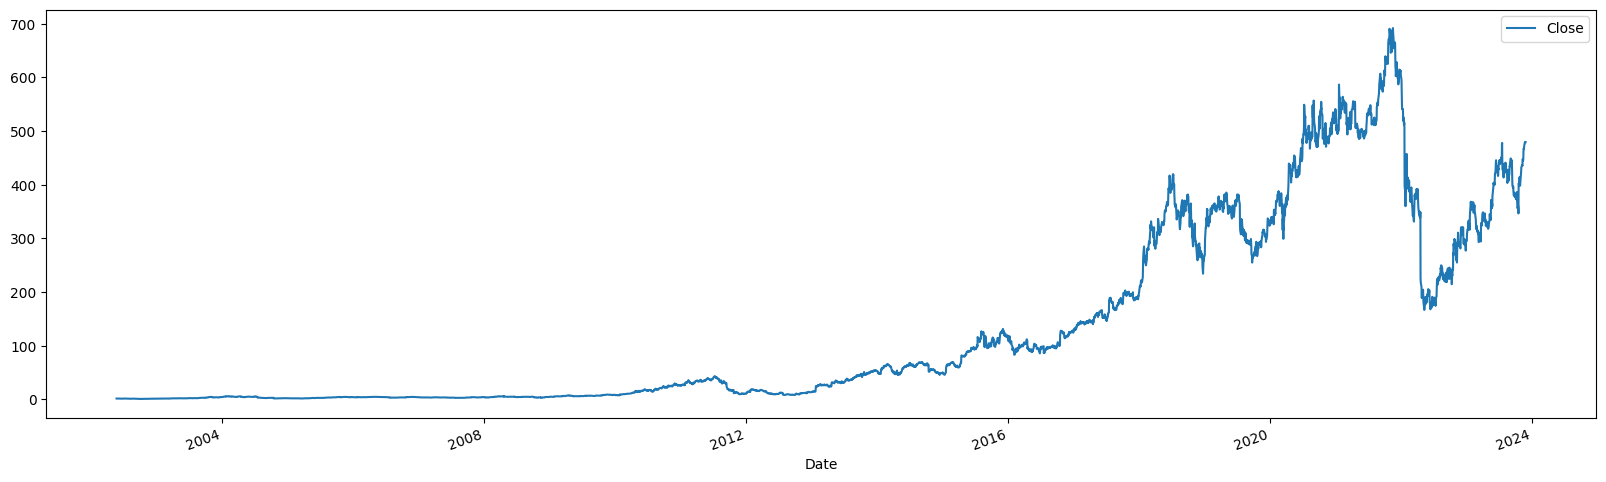

In [3]:
%matplotlib inline
nflx_hist.plot(x='Date', y='Close', kind='line', figsize=(20,6), rot=20)

In [4]:
#nflx_hist = nflx_hist[nflx_hist.Date > '01-01-1990']

# Extracting the closing prices of each day
FullData=nflx_hist[['Close']].values
print(FullData[0:5])
 
# Choosing between Standardization or normalization
#sc = StandardScaler()
sc=MinMaxScaler()
 
DataScaler = sc.fit(FullData)
X=DataScaler.transform(FullData)
#X=FullData
 
print('### After Normalization ###')
X[0:5]

[[1.19642901]
 [1.21000004]
 [1.157143  ]
 [1.10357106]
 [1.07142901]]
### After Normalization ###


array([[0.00119131],
       [0.00121094],
       [0.00113448],
       [0.00105699],
       [0.00101049]])

# Modelo para predecir 1 dia

In [5]:
# split into samples
X_samples = list()
y_samples = list()

NumerOfRows = len(X)
TimeSteps=50  # next day's Price Prediction is based on last how many past day's prices

# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i]
    X_samples.append(x_sample)
    y_samples.append(y_sample)

################################################
# Reshape the Input as a 3D (number of samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('\n#### Input Data shape ####')
print(X_data.shape)

# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
y_data=y_data.reshape(y_data.shape[0], 1)
print('\n#### Output Data shape ####')
print(y_data.shape)


#### Input Data shape ####
(5366, 50, 1)

#### Output Data shape ####
(5366, 1)


In [6]:
# Choosing the number of testing data records
TestingRecords=5
 
# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]
 
############################################
 
# Printing the shape of training and testing
print('\n#### Training Data shape ####')
print(X_train.shape)
print(y_train.shape)
print('\n#### Testing Data shape ####')
print(X_test.shape)
print(y_test.shape)


#### Training Data shape ####
(5361, 50, 1)
(5361, 1)

#### Testing Data shape ####
(5, 50, 1)
(5, 1)


In [7]:
# Visualizing the input and output being sent to the LSTM model
for inp, out in zip(X_train[0:2], y_train[0:2]):
    print(inp,'--', out)

[[0.00119131]
 [0.00121094]
 [0.00113448]
 [0.00105699]
 [0.00101049]
 [0.00101773]
 [0.00109315]
 [0.00107765]
 [0.00112002]
 [0.00117064]
 [0.00107869]
 [0.00113345]
 [0.00112931]
 [0.00104149]
 [0.00102703]
 [0.00088754]
 [0.00079455]
 [0.00077802]
 [0.00083691]
 [0.00084518]
 [0.00087721]
 [0.00087617]
 [0.00085551]
 [0.00089064]
 [0.00082555]
 [0.00090614]
 [0.00094747]
 [0.00115721]
 [0.00121714]
 [0.00130703]
 [0.00116134]
 [0.00113965]
 [0.00114378]
 [0.0012967 ]
 [0.00120784]
 [0.00111382]
 [0.00109005]
 [0.00103632]
 [0.00112312]
 [0.00113861]
 [0.00115411]
 [0.00111898]
 [0.00107249]
 [0.00095987]
 [0.00072119]
 [0.00072842]
 [0.00078318]
 [0.00084001]
 [0.00075012]
 [0.00058584]] -- [0.00058171]
[[0.00121094]
 [0.00113448]
 [0.00105699]
 [0.00101049]
 [0.00101773]
 [0.00109315]
 [0.00107765]
 [0.00112002]
 [0.00117064]
 [0.00107869]
 [0.00113345]
 [0.00112931]
 [0.00104149]
 [0.00102703]
 [0.00088754]
 [0.00079455]
 [0.00077802]
 [0.00083691]
 [0.00084518]
 [0.00087721]
 [0

In [8]:

# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 50
Number of Features: 1


In [9]:
keras.utils.set_random_seed(42)

# Initialising the RNN
regressor = Sequential()
 
# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor.add(LSTM(units = 10, activation = 'tanh', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Second Second hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Second Third hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))
 
 
# Adding the output layer
regressor.add(Dense(units = 1))
 
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
 
##################################################
 
import time
# Measuring the time taken by the model to train
StartTime=time.time()
 
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 10, epochs = 20, )
 
EndTime=time.time()
print("## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ##')



Epoch 1/20

537/537 [==============================] - 18s 26ms/step - loss: 0.0131
Epoch 2/20
537/537 [==============================] - 14s 26ms/step - loss: 9.7140e-04
Epoch 3/20
537/537 [==============================] - 14s 26ms/step - loss: 8.7884e-04
Epoch 4/20
537/537 [==============================] - 14s 26ms/step - loss: 8.1407e-04
Epoch 5/20
537/537 [==============================] - 14s 26ms/step - loss: 7.2798e-04
Epoch 6/20
537/537 [==============================] - 14s 26ms/step - loss: 6.2633e-04
Epoch 7/20
537/537 [==============================] - 14s 26ms/step - loss: 5.2323e-04
Epoch 8/20
537/537 [==============================] - 14s 27ms/step - loss: 4.8356e-04
Epoch 9/20
537/537 [==============================] - 14s 26ms/step - loss: 4.1969e-04
Epoch 10/20
537/537 [==============================] - 14s 27ms/step - loss: 3.5718e-04
Epoch 11/20
537/537 [==============================] - 14s 26ms/step - loss: 3.5293e-04
Epoch 12/20
537/537 [=====================

1/1 [==============================] - 1s 611ms/step
Accuracy: 96.39571041857106


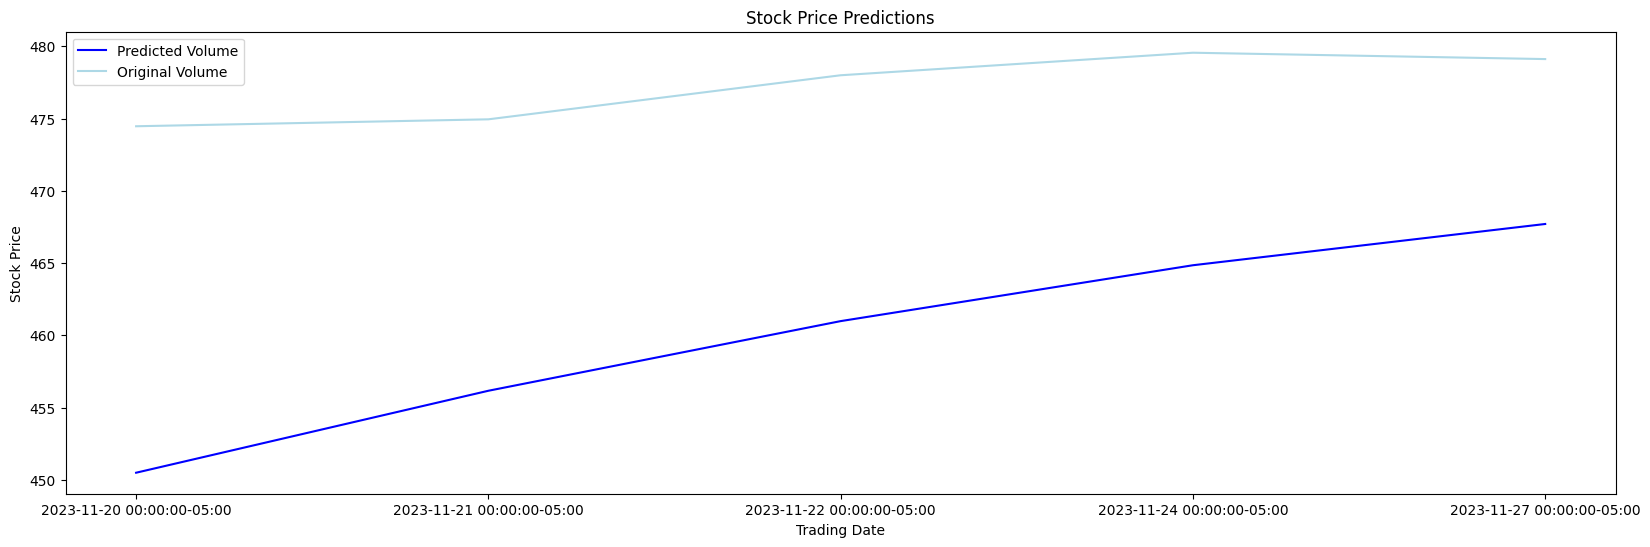

In [10]:
predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
 
# Getting the original price values for testing data
orig=y_test
orig=DataScaler.inverse_transform(y_test)
 
# Accuracy of the predictions
print('Accuracy:', 100 - (100*(abs(orig-predicted_Price)/orig)).mean())
 
# Visualising the results
import matplotlib.pyplot as plt
 
plt.plot(predicted_Price, color = 'blue', label = 'Predicted Volume')
plt.plot(orig, color = 'lightblue', label = 'Original Volume')
 
plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.xticks(range(TestingRecords), nflx_hist.tail(TestingRecords)['Date'])
plt.ylabel('Stock Price')
 
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

1/1 [==============================] - 0s 42ms/step


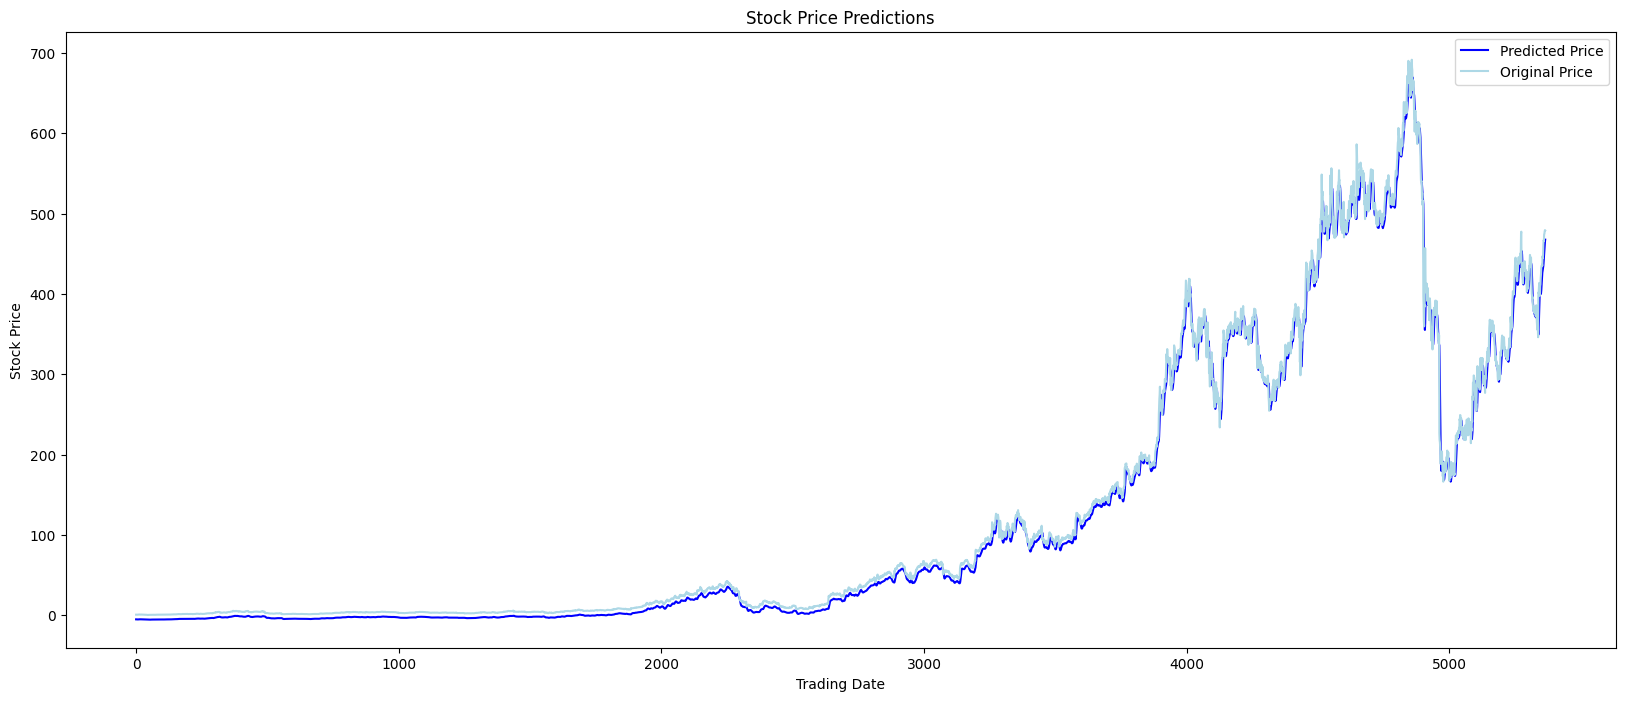

In [11]:

# Generating predictions on full data
TrainPredictions=DataScaler.inverse_transform(regressor.predict(X_train))
TestPredictions=DataScaler.inverse_transform(regressor.predict(X_test))
 
FullDataPredictions=np.append(TrainPredictions, TestPredictions)
FullDataOrig=FullData[TimeSteps:]
 
# plotting the full data
plt.plot(FullDataPredictions, color = 'blue', label = 'Predicted Price')
plt.plot(FullDataOrig , color = 'lightblue', label = 'Original Price')
 
 
plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.ylabel('Stock Price')
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(8)
plt.show()

In [12]:
FullData[-51:-1]

array([[396.94000244],
       [394.3999939 ],
       [396.20001221],
       [386.29998779],
       [384.1499939 ],
       [379.80999756],
       [384.79998779],
       [379.25      ],
       [377.58999634],
       [376.35998535],
       [377.6000061 ],
       [380.32998657],
       [376.75      ],
       [376.8999939 ],
       [372.58999634],
       [381.51000977],
       [385.95001221],
       [373.32000732],
       [365.92999268],
       [361.20001221],
       [355.67999268],
       [360.82000732],
       [355.72000122],
       [346.19000244],
       [401.76998901],
       [400.95999146],
       [406.83999634],
       [413.73001099],
       [411.25      ],
       [403.54000854],
       [397.86999512],
       [410.07998657],
       [411.69000244],
       [420.19000244],
       [424.70999146],
       [432.35998535],
       [434.73999023],
       [434.60998535],
       [436.6499939 ],
       [435.1499939 ],
       [447.23999023],
       [444.61999512],
       [448.6499939 ],
       [461

In [13]:

# Last 10 days prices
LastDays=FullData[-51:-1]
 
# Normalizing the data just like we did for training the model
LastDays=DataScaler.transform(LastDays.reshape(-1,1))
 
# Changing the shape of the data to 3D
# Choosing TimeSteps as 10 because we have used the same for training
NumSamples=1
TimeSteps=50
NumFeatures=1
LastDays=LastDays.reshape(NumSamples,TimeSteps,NumFeatures)
 
#############################
 
# Making predictions on data
predicted_Price = regressor.predict(LastDays)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
predicted_Price

1/1 [==============================] - 0s 48ms/step


array([[467.70465]], dtype=float32)

In [14]:
diff = predicted_Price-FullData[-1]
diff[0][0]

-11.41534423828125

# Modelos multi-step para predecir varios dias

In [15]:

# Considering the Full Data again which we extracted above
# Printing the last 10 values
print('Original Prices')
print(FullData[-50:])
 
print('###################')
 
# Printing last 10 values of the scaled data which we have created above for the last model
# Here I am changing the shape of the data to one dimensional array because
# for Multi step data preparation we need to X input in this fashion
X=X.reshape(X.shape[0],)
print('Scaled Prices')
print(X[-50:])

Original Prices
[[394.3999939 ]
 [396.20001221]
 [386.29998779]
 [384.1499939 ]
 [379.80999756]
 [384.79998779]
 [379.25      ]
 [377.58999634]
 [376.35998535]
 [377.6000061 ]
 [380.32998657]
 [376.75      ]
 [376.8999939 ]
 [372.58999634]
 [381.51000977]
 [385.95001221]
 [373.32000732]
 [365.92999268]
 [361.20001221]
 [355.67999268]
 [360.82000732]
 [355.72000122]
 [346.19000244]
 [401.76998901]
 [400.95999146]
 [406.83999634]
 [413.73001099]
 [411.25      ]
 [403.54000854]
 [397.86999512]
 [410.07998657]
 [411.69000244]
 [420.19000244]
 [424.70999146]
 [432.35998535]
 [434.73999023]
 [434.60998535]
 [436.6499939 ]
 [435.1499939 ]
 [447.23999023]
 [444.61999512]
 [448.6499939 ]
 [461.94000244]
 [466.95001221]
 [465.91000366]
 [474.47000122]
 [474.95001221]
 [478.        ]
 [479.55999756]
 [479.11999512]]
###################
Scaled Prices
[0.56996581 0.57256956 0.55824904 0.55513904 0.54886117 0.55607927
 0.54805113 0.54564991 0.54387068 0.54566439 0.54961335 0.54443485
 0.54465181 0.5

# Modelo para 5 dias

In [16]:

# Multi step data preparation
 
# split into samples
X_samples = list()
y_samples = list()
 
NumerOfRows = len(X)
TimeSteps=120  # next few day's Price Prediction is based on last how many past day's prices
FutureTimeSteps=5 # How many days in future you want to predict the prices
 
# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows-FutureTimeSteps , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i:i+FutureTimeSteps]
    X_samples.append(x_sample)
    y_samples.append(y_sample)
 
################################################
 
# Reshape the Input as a 3D (samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('### Input Data Shape ###') 
print(X_data.shape)
 
# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
print('### Output Data Shape ###') 
print(y_data.shape)

### Input Data Shape ###
(5291, 120, 1)
### Output Data Shape ###
(5291, 5)


In [17]:

# Choosing the number of testing data records
TestingRecords=5
 
# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]
 
#############################################
# Printing the shape of training and testing
print('\n#### Training Data shape ####')
print(X_train.shape)
print(y_train.shape)
 
print('\n#### Testing Data shape ####')
print(X_test.shape)
print(y_test.shape)


#### Training Data shape ####
(5286, 120, 1)
(5286, 5)

#### Testing Data shape ####
(5, 120, 1)
(5, 5)


In [18]:

# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 120
Number of Features: 1


In [22]:
keras.utils.set_random_seed(42)
 
# Initialising the RNN
regressor_5 = Sequential()
 
# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor_5.add(LSTM(units = 10, activation = 'tanh', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
 
# Adding the Second hidden layer and the LSTM layer
regressor_5.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Third hidden layer and the LSTM layer
regressor_5.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))
 
 
# Adding the output layer
# Notice the number of neurons in the dense layer is now the number of future time steps 
# Based on the number of future days we want to predict
regressor_5.add(Dense(units = FutureTimeSteps))
 
# Compiling the RNN
regressor_5.compile(optimizer = 'adam', loss = 'mean_squared_error')
 
###################################################################
 
import time
# Measuring the time taken by the model to train
StartTime=time.time()
 
# Fitting the RNN to the Training set
regressor_5.fit(X_train, y_train, batch_size = 10, epochs = 20)
 
EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/20
529/529 [==============================] - 34s 58ms/step - loss: 0.0108
Epoch 2/20
529/529 [==============================] - 32s 60ms/step - loss: 0.0011
Epoch 3/20
529/529 [==============================] - 32s 61ms/step - loss: 8.3791e-04
Epoch 4/20
529/529 [==============================] - 32s 60ms/step - loss: 7.1930e-04
Epoch 5/20
529/529 [==============================] - 31s 59ms/step - loss: 6.2327e-04
Epoch 6/20
529/529 [==============================] - 30s 57ms/step - loss: 5.2390e-04
Epoch 7/20
529/529 [==============================] - 31s 58ms/step - loss: 4.9328e-04
Epoch 8/20
529/529 [==============================] - 31s 59ms/step - loss: 4.5242e-04
Epoch 9/20
529/529 [==============================] - 31s 58ms/step - loss: 4.4210e-04
Epoch 10/20
529/529 [==============================] - 30s 56ms/step - loss: 4.8195e-04
Epoch 11/20
529/529 [==============================] - 32s 60ms/step - loss: 4.0425e-04
Epoch 12/20
529/529 [============================

In [23]:
# Making predictions on test data
predicted_Price = regressor_5.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
print('#### Predicted Prices ####')
print(predicted_Price)
 
# Getting the original price values for testing data
orig=y_test
orig=DataScaler.inverse_transform(y_test)
print('\n#### Original Prices ####')
print(orig)

1/1 [==============================] - 1s 645ms/step
#### Predicted Prices ####
[[442.82544 441.72797 440.40872 443.7882  445.55646]
 [443.6893  443.10245 441.6361  446.5465  447.61923]
 [447.11368 446.30356 444.89554 449.17557 450.46762]
 [455.5942  454.4002  453.08182 456.306   458.07892]
 [461.73413 460.85953 459.43018 463.67157 465.13565]]

#### Original Prices ####
[[444.61999512 448.6499939  461.94000244 466.95001221 465.91000366]
 [448.6499939  461.94000244 466.95001221 465.91000366 474.47000122]
 [461.94000244 466.95001221 465.91000366 474.47000122 474.95001221]
 [466.95001221 465.91000366 474.47000122 474.95001221 478.        ]
 [465.91000366 474.47000122 474.95001221 478.         479.55999756]]


In [24]:
# Making predictions on test data
LastDaysPrices=FullData[-55:-5]
 
# Reshaping the data to (-1,1 )because its a single entry
LastDaysPrices=LastDaysPrices.reshape(-1, 1)
 
# Scaling the data on the same level on which model was trained
X_test=DataScaler.transform(LastDaysPrices)
 
NumberofSamples=1
TimeSteps=X_test.shape[0]
NumberofFeatures=X_test.shape[1]
# Reshaping the data as 3D input
X_test=X_test.reshape(NumberofSamples,TimeSteps,NumberofFeatures)
 
# Generating the predictions for next 5 days
Next5DaysPrice = regressor_5.predict(X_test)
 
# Generating the prices in original scale
Next5DaysPrice = DataScaler.inverse_transform(Next5DaysPrice)
Next5DaysPrice

1/1 [==============================] - 1s 813ms/step


array([[464.46588, 463.92984, 462.39316, 467.67285, 468.78653]],
      dtype=float32)

In [25]:
valid_5 = FullData[-5:]

Next5Days = Next5DaysPrice[0]


mse_ls = []

for x in zip(valid_5,Next5Days):
    mse_ls.append(x[0][0]-x[1])


print(np.average(mse_ls))

11.77034912109375


In [26]:
last50 = nflx_hist.tail(50)[['Date','Close']]

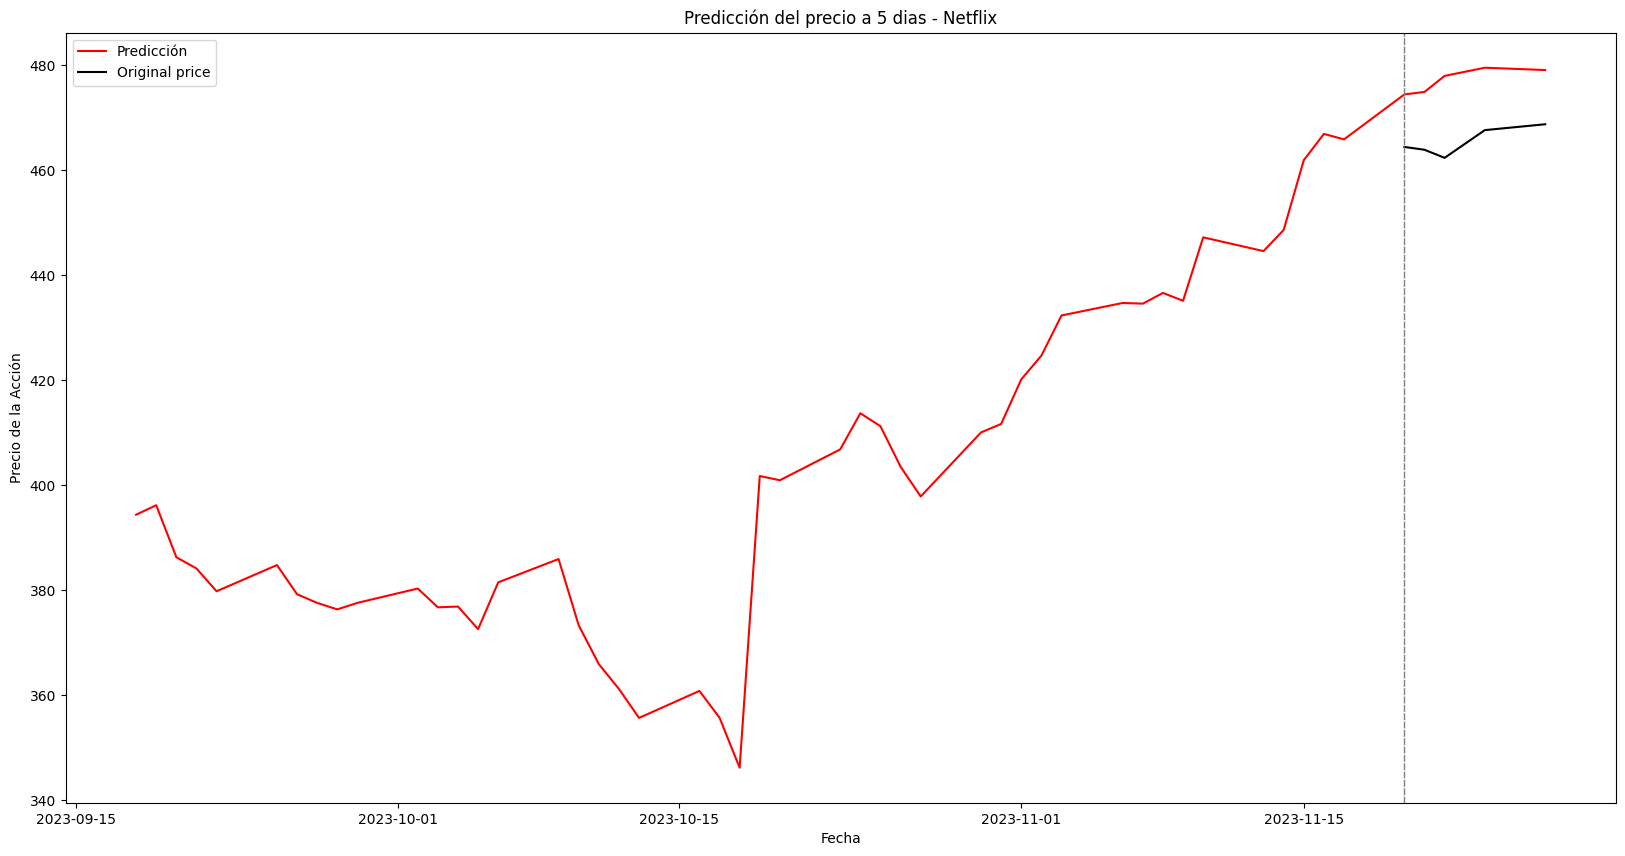

In [27]:
# Visualising the results
plt.plot(last50.Date,last50.Close, color = 'red', label = 'Predicción')
plt.plot(last50.Date.tail(5),Next5Days, color = 'black', label = 'Original price')
plt.axvline(last50.Date.iloc[-5],linestyle=(0, (5, 1)), linewidth=1, color="gray")

plt.title('Predicción del precio a 5 dias - Netflix')
plt.xlabel('Fecha')

#startDateIndex=(FutureTimeSteps*TestingRecords)-FutureTimeSteps*(i+1)
#endDateIndex=(FutureTimeSteps*TestingRecords)-FutureTimeSteps*(i+1) + FutureTimeSteps
TotalRows=nflx_hist.shape[0]

#plt.xticks(last120.Date)
plt.ylabel('Precio de la Acción')

plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(10)
plt.show()

# Modelo para 20 dias

In [28]:

# Multi step data preparation
 
# split into samples
X_samples = list()
y_samples = list()
 
NumerOfRows = len(X)
TimeSteps=240  # next few day's Price Prediction is based on last how many past day's prices
FutureTimeSteps=20 # How many days in future you want to predict the prices
 
# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows-FutureTimeSteps , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i:i+FutureTimeSteps]
    X_samples.append(x_sample)
    y_samples.append(y_sample)
 
################################################
 
# Reshape the Input as a 3D (samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('### Input Data Shape ###') 
print(X_data.shape)
 
# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
print('### Output Data Shape ###') 
print(y_data.shape)

### Input Data Shape ###
(5156, 240, 1)
### Output Data Shape ###
(5156, 20)


In [29]:

# Choosing the number of testing data records
TestingRecords=20
 
# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]
 
#############################################
# Printing the shape of training and testing
print('\n#### Training Data shape ####')
print(X_train.shape)
print(y_train.shape)
 
print('\n#### Testing Data shape ####')
print(X_test.shape)
print(y_test.shape)


#### Training Data shape ####
(5136, 240, 1)
(5136, 20)

#### Testing Data shape ####
(20, 240, 1)
(20, 20)


In [30]:

# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 240
Number of Features: 1


In [31]:
keras.utils.set_random_seed(42)
 
# Initialising the RNN
regressor_20 = Sequential()
 
# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor_20.add(LSTM(units = 10, activation = 'tanh', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
 
# Adding the Second hidden layer and the LSTM layer
regressor_20.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Third hidden layer and the LSTM layer
regressor_20.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))
 
 
# Adding the output layer
# Notice the number of neurons in the dense layer is now the number of future time steps 
# Based on the number of future days we want to predict
regressor_20.add(Dense(units = FutureTimeSteps))
 
# Compiling the RNN
regressor_20.compile(optimizer = 'adam', loss = 'mean_squared_error')
 
###################################################################
 
import time
# Measuring the time taken by the model to train
StartTime=time.time()
 
# Fitting the RNN to the Training set
regressor_20.fit(X_train, y_train, batch_size = 10, epochs = 20)
 
EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/20
514/514 [==============================] - 66s 122ms/step - loss: 0.0303
Epoch 2/20
514/514 [==============================] - 63s 122ms/step - loss: 0.0025
Epoch 3/20
514/514 [==============================] - 61s 118ms/step - loss: 0.0015
Epoch 4/20
514/514 [==============================] - 61s 119ms/step - loss: 0.0014
Epoch 5/20
514/514 [==============================] - 57s 111ms/step - loss: 0.0013
Epoch 6/20
514/514 [==============================] - 61s 120ms/step - loss: 0.0012
Epoch 7/20
514/514 [==============================] - 57s 112ms/step - loss: 0.0011
Epoch 8/20
514/514 [==============================] - 57s 111ms/step - loss: 0.0011
Epoch 9/20
514/514 [==============================] - 58s 113ms/step - loss: 0.0011
Epoch 10/20
514/514 [==============================] - 57s 112ms/step - loss: 0.0010
Epoch 11/20
514/514 [==============================] - 55s 107ms/step - loss: 0.0011
Epoch 12/20
514/514 [==============================] - 58s 113ms/step - lo

In [32]:
# Making predictions on test data
predicted_Price = regressor_20.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
print('#### Predicted Prices ####')
print(predicted_Price)
 
# Getting the original price values for testing data
orig=y_test
orig=DataScaler.inverse_transform(y_test)
print('\n#### Original Prices ####')
print(orig)

1/1 [==============================] - 1s 616ms/step
#### Predicted Prices ####
[[369.95557 369.7786  368.67883 368.5543  369.7722  371.76074 373.3799
  371.946   372.0905  369.30106 367.48602 368.39093 367.3631  365.8665
  368.6849  367.7077  368.6253  368.90524 369.8763  369.00034]
 [368.86798 368.70148 367.7844  367.5806  368.84555 370.7301  372.1866
  370.9119  370.92825 368.39005 366.49323 367.31793 366.3449  364.9524
  367.6817  366.83783 367.6073  367.9482  368.83246 368.02902]
 [367.7472  367.6145  366.78812 366.54135 367.8446  369.65555 371.0313
  369.8303  369.807   367.3599  365.444   366.23087 365.28845 363.96335
  366.62506 365.8289  366.54736 366.9113  367.743   366.96878]
 [366.7601  366.64484 365.91818 365.62695 366.96155 368.70633 369.99307
  368.87695 368.7935  366.47043 364.51938 365.26318 364.3523  363.09085
  365.69406 364.9635  365.61026 366.00433 366.7847  366.0477 ]
 [365.542   365.42355 364.65747 364.38657 365.70596 367.47034 368.78915
  367.64096 367.58377 365

In [33]:
# Making predictions on test data
LastDaysPrices=FullData[-140:-20]
 
# Reshaping the data to (-1,1 )because its a single entry
LastDaysPrices=LastDaysPrices.reshape(-1, 1)
 
# Scaling the data on the same level on which model was trained
X_test=DataScaler.transform(LastDaysPrices)
 
NumberofSamples=1
TimeSteps=X_test.shape[0]
NumberofFeatures=X_test.shape[1]
# Reshaping the data as 3D input
X_test=X_test.reshape(NumberofSamples,TimeSteps,NumberofFeatures)
 
# Generating the predictions for next 5 days
Next20DaysPrice = regressor_20.predict(X_test)


# Generating the prices in original scale
Next20DaysPrice = DataScaler.inverse_transform(Next20DaysPrice)
Next20DaysPrice

1/1 [==============================] - 1s 564ms/step


array([[392.12964, 394.59906, 398.36823, 395.61954, 399.63092, 397.2736 ,
        394.7682 , 396.98984, 395.75018, 396.41873, 393.77194, 392.76938,
        393.3262 , 395.62393, 394.3574 , 395.1728 , 394.04092, 395.46356,
        393.42593, 393.6447 ]], dtype=float32)

In [34]:
regressor_20.predict(X_test)

1/1 [==============================] - 0s 103ms/step


array([[0.5666817 , 0.57025373, 0.5757059 , 0.5717299 , 0.5775324 ,
        0.5741225 , 0.5704984 , 0.57371205, 0.57191885, 0.57288593,
        0.5690573 , 0.5676071 , 0.56841254, 0.5717362 , 0.56990415,
        0.57108366, 0.5694464 , 0.57150424, 0.5685568 , 0.5688733 ]],
      dtype=float32)

In [35]:
valid_20 = FullData[-20:]

Next20Days = Next20DaysPrice[0]

mse_ls = []

for x in zip(valid_20,Next20Days):
    mse_ls.append(x[0][0]-x[1])

print(np.average(mse_ls))

52.922262573242186


In [36]:
last120 = nflx_hist.tail(120)[['Date','Close']]

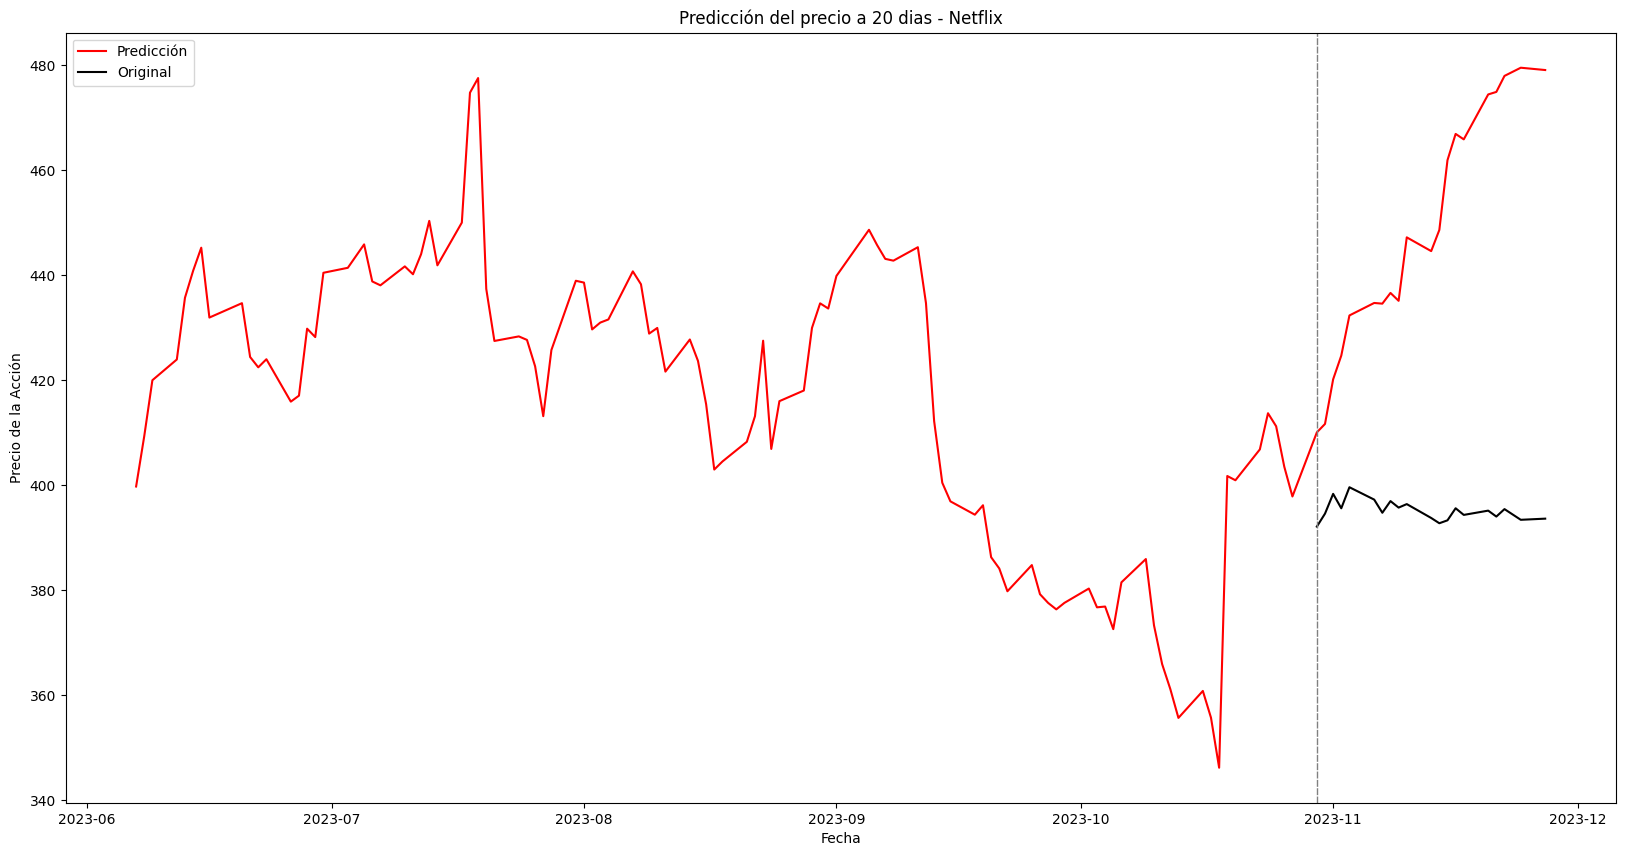

In [37]:
# Visualising the results
plt.plot(last120.Date,last120.Close, color = 'red', label = 'Predicción')
plt.plot(last120.Date.tail(20),Next20Days, color = 'black', label = 'Original')
plt.axvline(last120.Date.iloc[-20],linestyle=(0, (5, 1)), linewidth=1, color="gray")

plt.title('Predicción del precio a 20 dias - Netflix')
plt.xlabel('Fecha')

#startDateIndex=(FutureTimeSteps*TestingRecords)-FutureTimeSteps*(i+1)
#endDateIndex=(FutureTimeSteps*TestingRecords)-FutureTimeSteps*(i+1) + FutureTimeSteps
TotalRows=nflx_hist.shape[0]

#plt.xticks(last120.Date)
plt.ylabel('Precio de la Acción')

plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(10)
plt.show()